In [1]:
from plotnine import *
import pandas as pd
import numpy as np

In [7]:
time = "2024-03-14_14:51"
time = "2024-03-14_15:32"
time = "2024-03-14_17:26"
time = "2024-03-14_18:18"
time = "2024-03-14_19:00"
# time = "2024-03-14_20:08"
time = "2024-03-15_10:31"
time = "2024-03-15_13:27"
time = "2024-03-15_15:44"
time = "2024-03-15_16:27"
time = "2024-03-16_13:35"
time = "2024-03-18_09:34"
# time = "2024-03-18_16:10"
# time = "2024-03-19_00:56"
# time = "2024-03-20_04:35"
time = "2024-03-20_08:28"
time = "2024-03-20_13:00"
time = "2024-03-21_07:59"
# time = "2024-03-21_10:50"
time = "2024-03-21_20:28"
time = "2024-03-21_21:59"
time = "2024-03-22_19:23"
# time = "2024-03-23_02:14"
time = "2024-03-23_07:49"
time = "2024-03-25_01:47"

# time = "2024-03-29_04:53"
time = "2024-03-29_07:23"
time = "2024-03-31_15:54"


df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

# df['test_cumsum_annualized_return'] = df['test_cumsum_annualized_return'] * -1
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["window"] < 5]
# df = df[df["random_state"] == 42]
# df = df[df["test_size"] == 2880]
# df = df[df["n_clusters"] == 100]
# df = df[df["log_return_threshold"] <= 0.01]
df = df[df["test_negative_sharpe_ratio"] >= 0.9]

df

,window,train_sum_annualized_return,train_sum_actual_return,train_n_trades,test_sum_annualized_return,test_sum_actual_return,test_n_trades,train_cumsum_annualized_return,train_cumsum_actual_return,train_sharpe_ratio,test_cumsum_annualized_return,test_cumsum_actual_return,test_sharpe_ratio,test_negative_sharpe_ratio,train_size,test_size,random_state
1661,0,1.20,120,422,-0.21,-21,62,1.20,120,3.418572,-0.21,-21,-1.210629,1.028205,5760,960,8
1662,1,1.26,126,407,-0.09,-9,48,2.46,246,3.418572,-0.30,-30,-1.210629,1.028205,5760,960,8
1663,2,1.43,143,389,-0.12,-12,69,3.89,389,3.418572,-0.42,-42,-1.210629,1.028205,5760,960,8
1664,3,1.46,146,358,-0.17,-17,77,5.35,535,3.418572,-0.59,-59,-1.210629,1.028205,5760,960,8
1665,4,1.05,105,361,0.00,0,67,6.40,640,3.418572,-0.59,-59,-1.210629,1.028205,5760,960,8
1666,5,1.16,116,400,-0.19,-19,91,7.56,756,3.418572,-0.78,-78,-1.210629,1.028205,5760,960,8
1667,6,1.27,127,418,-0.25,-25,57,8.83,883,3.418572,-1.03,-103,-1.210629,1.028205,5760,960,8
1668,7,1.46,146,410,-0.07,-7,89,10.29,1029,3.418572,-1.10,-110,-1.210629,1.028205,5760,960,8
1669,8,1.42,142,403,0.13,13,59,11.71,1171,3.418572,-0.97,-97,-1.210629,1.028205,5760,960,8
1670,9,2.39,239,461,-0.12,-12,53,14.10,1410,3.418572,-1.09,-109,-1.210629,1.028205,5760,960,8


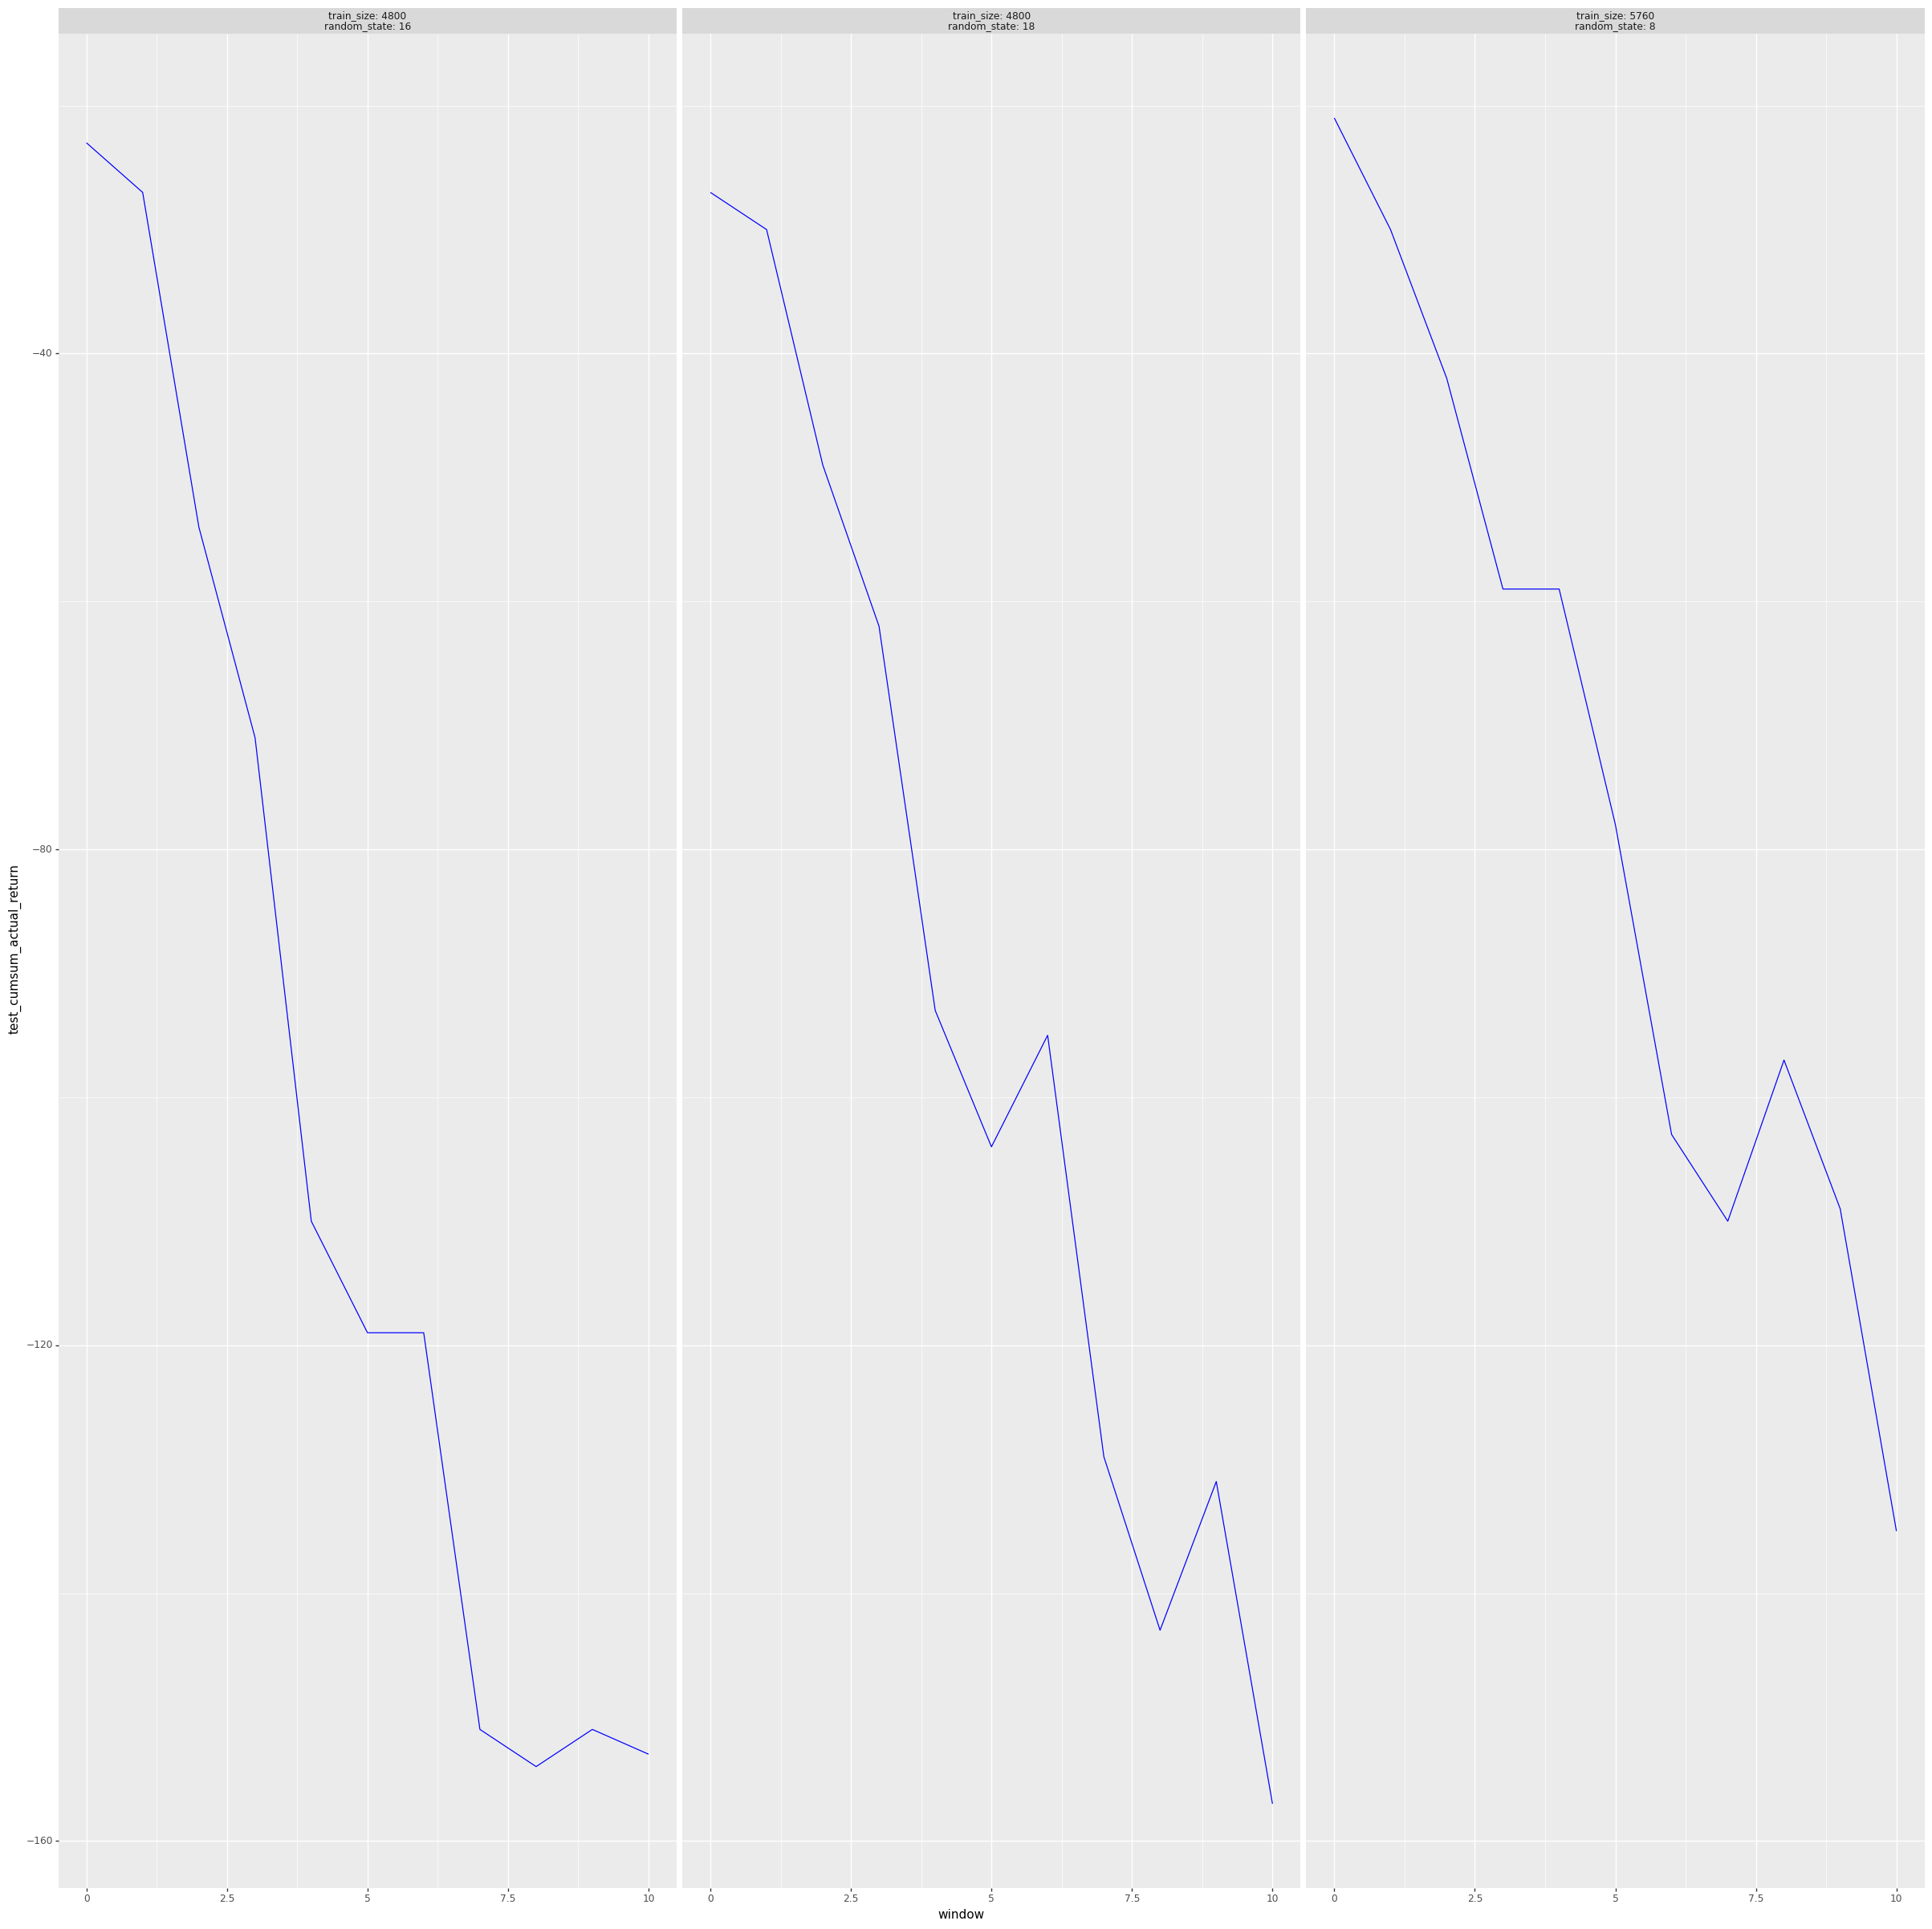

In [8]:
p = ggplot(df)
# p = p + geom_line(aes(x="window", y="train_cumsum_annualized_return"), color="red")
p = p + geom_line(aes(x="window", y="test_cumsum_actual_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_avg_calmar_ratio"), color="red")
p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
# p = p + facet_wrap("~train_size + test_size + random_state + n_clusters", scales="free_x", labeller="label_both")
p = p + theme(figure_size=(30, 30))
# p = p + theme(figure_size=(10, 10))
print(p)

In [ ]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)

In [ ]:
4 * 24 * 20